<a href="https://colab.research.google.com/github/subaruosawa/last-piriod/blob/master/youtube%E5%8B%95%E7%94%BB%E6%83%85%E5%A0%B1%E5%8F%96%E5%BE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import json
import datetime
import dateutil.parser
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [ ]:
pip install python-dateutil

In [ ]:
channel_Id = [
#チャンネルID
]

In [ ]:

#チャンネルIDから動画情報を引き出す
s_dataset = []
 
for channel_id in channel_Id:
  options = {
    'key': #youtubeキー,
    'part': 'id,snippet',
    "maxResults":50,
    "order":"date",
    "type":"video",
    "q":#検索キーワード,
    'channelId': channel_id
    }
 
  r = requests.get('https://www.googleapis.com/youtube/v3/search', params=options)
  s_data = r.json()
  
  s_dataset.append(s_data)

In [ ]:
#リストの構造が複雑なため、for文を回してデータを振り分ける
temp = []
 
for i in s_dataset:
  temp.append(i["items"])

In [ ]:
videoId = []
publishedAt = []
title = []
channelTitle = []
 
for ii in temp:
  for iii in ii:
    videoId.append(iii["id"]["videoId"])
    publishedAt.append(iii["snippet"]["publishedAt"])
    title.append(iii["snippet"]["title"])
    channelTitle.append(iii["snippet"]["channelTitle"])
#エラー吐かなかったらOK

In [ ]:
#日付を日本時間に直す
date = []
date_str = []
 
JST = datetime.timezone(datetime.timedelta(hours=+9), 'JST')
 
for i, video_date in enumerate(publishedAt):
  jst_datetime = dateutil.parser.parse(video_date).astimezone(JST)
  date.append(jst_datetime.date())
  date_str.append(str(jst_datetime.date()))

In [ ]:

#ビデオIDから各種数値を取得する
viewCount = []
likeCount = []
dislikeCount = []
favoriteCount = []
commentCount = []
 
for video_id in videoId:
  options = {
    'key': #youtubeキー,
    'id': video_id,
    'part': 'statistics'
    }
 
  r = requests.get('https://www.googleapis.com/youtube/v3/videos', params=options)
  v_data = r.json()
  viewCount.append(int(v_data['items'][0]['statistics']['viewCount']))
  likeCount.append(int(v_data['items'][0]['statistics']['likeCount']))
  dislikeCount.append(int(v_data['items'][0]['statistics']['dislikeCount']))
  favoriteCount.append(int(v_data['items'][0]['statistics']['favoriteCount']))
  commentCount.append(int(v_data['items'][0]['statistics']['commentCount']))

In [ ]:
#dateデータがdatetime関数でなくstrの場合
#文字列⇒日付型
#-もしくは/で区別される
date = []
 
for i in date_str:
  date_formatted = datetime.datetime.strptime(i, "%Y-%m-%d")
  date.append(date_formatted)
  #print(date_formatted) # 2017-11-06 00:00:00
 
date

In [ ]:
df = pd.DataFrame({
    "date":date,
    "channelTitle":channelTitle,
    "title":title,
    "viewCount":viewCount,
    "likeCount":likeCount,
    "dislikeCount":dislikeCount,
    "favoriteCount":favoriteCount,
    "commentCount":commentCount
})
df

,date,channelTitle,title,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,2020-05-25,愛園 愛美/Aizono Manami,【APEX】ランクマでもやっぱりレヴくんがすき【にじさんじ/愛園愛美】,19734,862,9,0,9
1,2020-05-14,愛園 愛美/Aizono Manami,【APEX】しーずんふぁいぶあげみざわ【愛園愛美/うさます/聖女れりあ】,3081,226,2,0,1
2,2020-05-12,愛園 愛美/Aizono Manami,【APEX】雪待さんは愛園愛美のオタク女子ってマ…？？【雎雪待/愛園愛美】,23702,1159,5,0,4
3,2020-05-06,愛園 愛美/Aizono Manami,【APEX】大丈夫、今日こそちゃんぽん食べられる【にじさんじ/愛園愛美】,11092,580,2,0,0
4,2020-05-03,愛園 愛美/Aizono Manami,【APEX】皿うどんがすき【愛園愛美/山神カルタ/雪城眞尋】,8435,494,1,0,0
...,...,...,...,...,...,...,...,...
532,2020-05-05,ルイス・キャミー,【APEX】まだまだ初心者だけどレベルとランク上げ！【ルイス・キャミー/にじさんじ】,10371,496,4,0,3
533,2020-05-01,ルイス・キャミー,【APEX】はじめてのAPEX！！戦場をかけまわるぞーー！【ルイス・キャミー/にじさんじ】,15931,680,2,0,6
534,2020-05-27,レヴィ・エリファ-Levi Elipha-,【APEX】よわよわ亜人、一人で挑ム！【にじさんじ/レヴィ・エリファ】,20187,928,8,0,2
535,2020-05-13,レヴィ・エリファ-Levi Elipha-,【APEX】よわよわ亜人、新シリーズに挑戦！【にじさんじ/レヴィ・エリファ/雪城真尋/山神カルタ】,8040,500,1,0,1


In [ ]:
#dateデータを時系列順に並び替える
day = []
for i in set(date):
  day.append(i)
 
date_x = np.sort(np.array(day))
date_x

array([datetime.date(2020, 4, 2), datetime.date(2020, 4, 5),
       datetime.date(2020, 4, 7), datetime.date(2020, 4, 9),
       datetime.date(2020, 4, 10), datetime.date(2020, 4, 12),
       datetime.date(2020, 4, 13), datetime.date(2020, 4, 15),
       datetime.date(2020, 4, 16), datetime.date(2020, 4, 17),
       datetime.date(2020, 4, 18), datetime.date(2020, 4, 19),
       datetime.date(2020, 4, 20), datetime.date(2020, 4, 21),
       datetime.date(2020, 4, 22), datetime.date(2020, 4, 23),
       datetime.date(2020, 4, 24), datetime.date(2020, 4, 25),
       datetime.date(2020, 4, 26), datetime.date(2020, 4, 27),
       datetime.date(2020, 4, 28), datetime.date(2020, 4, 29),
       datetime.date(2020, 4, 30), datetime.date(2020, 5, 1),
       datetime.date(2020, 5, 2), datetime.date(2020, 5, 3),
       datetime.date(2020, 5, 4), datetime.date(2020, 5, 5),
       datetime.date(2020, 5, 6), datetime.date(2020, 5, 7),
       datetime.date(2020, 5, 8), datetime.date(2020, 5, 9),
     

In [ ]:
#日付ごとの再生数の合計を出す
target_y = df.groupby('date').sum().viewCount

(54,)

In [ ]:
#確認用
df_day = pd.DataFrame({
    "date":date_x,
    "viewcount_sum":target_y
})
df_day

,date,viewcount_sum
date,,
2020-04-02,2020-04-02,17197
2020-04-05,2020-04-05,3886
2020-04-07,2020-04-07,64904
2020-04-09,2020-04-09,36384
2020-04-10,2020-04-10,147273
2020-04-12,2020-04-12,51063
2020-04-13,2020-04-13,213796
2020-04-15,2020-04-15,80904
2020-04-16,2020-04-16,99683


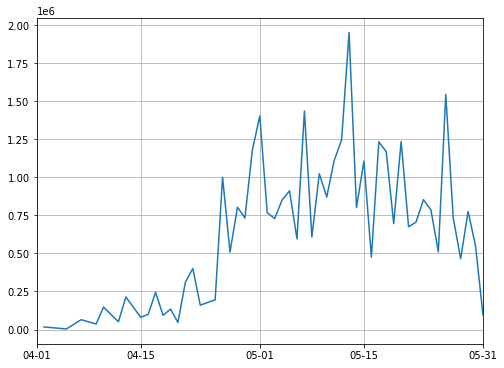

In [ ]:
#可視化させる
 
x = date_x
y = target_y
 
# データをセット
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(x, y)
 
# Formatterでx軸の日付ラベルを月・日に設定
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
 
# x軸の範囲
ax.set_xlim(datetime.datetime(2020,4,1), datetime.datetime(2020,5,31))
ax.set_xticks([
               datetime.datetime(2020,4,1),
               datetime.datetime(2020,4,15),
               datetime.datetime(2020,5,1),
               datetime.datetime(2020,5,15),
               datetime.datetime(2020,5,31)
               ])
ax.grid(True)
fig.savefig("img.png")